# Create a Data Story - Film Genre Statistics

### Introduction:

Movies are an important medium of entertainment for people. The business in movie industry has a keen interest to know what might be the factors that keep the audience interested in specific Genre.

Following is an analysis on a Dataset on Movies Released from 1995 to 2018 collected from [here](https://www.kaggle.com/datasets/thedevastator/film-genre-statistics/data). 

As mentioned - *This dataset contains genre statistics for movies released between 1995 and 2018. It provides information on various aspects of the movies, such as gross revenue, tickets sold, and inflation-adjusted figures. The dataset includes columns for genre, year of release, number of movies released in each genre and year, total gross revenue generated by movies in each genre and year, total number of tickets sold for movies in each genre and year, inflation-adjusted gross revenue that takes into account changes in the value of money over time, title of the highest-grossing movie in each genre and year, gross revenue generated by the highest-grossing movie in each genre and year, and inflation-adjusted gross revenue of the highest-grossing movie in each genre and year. This dataset offers insights into film industry trends over a span of more than two decades.*

From this dataset, we would like to get some ideas on:
* Which one was the most popular movie?
* Maximum how long has been a popular movie been popular?
* What does the number says on the Total and Gross in a year?
* What are the popular Genre?

Now Lets start digging the dataset.

In [1]:
%reset -f

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

In [3]:
df = pd.read_csv('ThrowbackData.csv', index_col='index')
df.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
index,,,,,,,,,
0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


In [4]:
df.tail()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
index,,,,,,,,,
295,Multiple Genres,2017,5,4614134,514394,4614114,2017 Oscar Shorts,2835355,2.835343e+06
296,Multiple Genres,2018,3,4787450,533717,4787441,2018 Oscar Shorts,3508777,3.508770e+06
297,Reality,2014,1,16826,2059,18469,The Principle,16826,1.846900e+04
298,Reality,2015,3,604870,71751,643606,Benpao Ba! Xiongdi,309297,3.291044e+05
299,Reality,2018,1,2027,225,2018,The Cage Fighter,2027,2.018000e+03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Genre                                           300 non-null    object 
 1   Year                                            300 non-null    int64  
 2   Movies Released                                 300 non-null    int64  
 3   Gross                                           300 non-null    int64  
 4   Tickets Sold                                    300 non-null    int64  
 5   Inflation-Adjusted Gross                        300 non-null    int64  
 6   Top Movie                                       300 non-null    object 
 7   Top Movie Gross (That Year)                     300 non-null    int64  
 8   Top Movie Inflation-Adjusted Gross (That Year)  300 non-null    float64
dtypes: float64(1), int64(6), object(2)
memory us

#### Observation:

The dataset has 300 rows (observations) on 9 different criterias (Columns).
* 'Genre',
* 'Year',
* 'Movies Released',
* 'Gross',
* 'Tickets Sold',
* 'Inflation-Adjusted Gross',
* 'Top Movie',
* 'Top Movie Gross (That Year)',
* 'Top Movie Inflation-Adjusted Gross (That Year)'.

In [6]:
yeartopdf = df[['Year','Top Movie','Top Movie Gross (That Year)','Top Movie Inflation-Adjusted Gross (That Year)']]
yeartopdf.sort_values(['Top Movie Gross (That Year)'],ascending=False)

,Year,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
index,,,,
20,2015,Star Wars Ep. VII: The Force Awakens,742208942,7.728414e+08
47,2018,Black Panther,700059566,7.000595e+08
44,2015,Jurassic World,652270625,6.723516e+08
41,2012,The Avengers,623279547,7.023639e+08
23,2018,Incredibles 2,608581744,6.085817e+08
...,...,...,...,...
283,2004,The Animation Show,36709,5.301679e+04
297,2014,The Principle,16826,1.846900e+04
246,2005,Major Dundee,14873,2.081000e+04


In [7]:
df.sort_values(['Tickets Sold'],ascending=False)

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
index,,,,,,,,,
7,Adventure,2002,45,2818919526,485184060,4352101018,Spider-Man,403706375,6.232781e+08
21,Adventure,2016,53,4159137913,478096752,4288527865,Finding Dory,486295561,5.014241e+08
9,Adventure,2004,47,2887833719,465029564,4171315189,Shrek 2,441226247,6.373268e+08
47,Action,2018,59,4142067464,461768924,4142067248,Black Panther,700059566,7.000595e+08
11,Adventure,2006,44,2743705092,418886249,3757409654,Pirates of the Caribbean: Dead Man’s Chest,423315812,5.797164e+08
...,...,...,...,...,...,...,...,...,...
283,Multiple Genres,2004,2,55134,8877,79627,The Animation Show,36709,5.301679e+04
246,Western,2005,1,14873,2320,20810,Major Dundee,14873,2.081000e+04
297,Reality,2014,1,16826,2059,18469,The Principle,16826,1.846900e+04


In [8]:
df.sort_values(['Gross'],ascending=False)

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
index,,,,,,,,,
21,Adventure,2016,53,4159137913,478096752,4288527865,Finding Dory,486295561,5.014241e+08
47,Action,2018,59,4142067464,461768924,4142067248,Black Panther,700059566,7.000595e+08
46,Action,2017,67,3305708764,368529372,3305708467,Wonder Woman,412563408,4.125634e+08
17,Adventure,2012,48,3284291528,412599414,3701016744,The Hobbit: An Unexpected Journey,263834893,2.973114e+08
15,Adventure,2010,44,3202949362,372676939,3342912143,Toy Story 3,415004880,4.331398e+08
...,...,...,...,...,...,...,...,...,...
283,Multiple Genres,2004,2,55134,8877,79627,The Animation Show,36709,5.301679e+04
297,Reality,2014,1,16826,2059,18469,The Principle,16826,1.846900e+04
246,Western,2005,1,14873,2320,20810,Major Dundee,14873,2.081000e+04


#### Observation:

The top Successful Year for a released movie was 2015 for **Star Wars Ep. VII: The Force Awakens** being the top gross for the year. But overall the highest Gross Income was by **Finding Dory (2016)**. Also, the most watched movie was **Spiderman (2002)**.

In [9]:
yeartopdf[yeartopdf.duplicated(subset="Top Movie", keep=False)]

,Year,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
index,,,,
98,1997,Titanic,157467971,3.077315e+08
99,1998,Titanic,443319081,8.478831e+08
145,1996,Jerry Maguire,83338125,1.691274e+08
146,1997,Jerry Maguire,70614467,1.379982e+08
176,2004,The Phantom of the Opera,16178431,2.336883e+07
177,2005,The Phantom of the Opera,35047365,4.904443e+07
184,2012,Beauty and the Beast,218813467,2.465775e+08
185,2013,Frozen,296691729,3.273462e+08
186,2014,Frozen,104046280,1.142344e+08


Observation:

There have been several movies that were top movies for two consecutive years in a row. The top movies among these are- 
* Titanic (1997-98),
* Jerry Maguire (1996-97),
* The Phantom of the Opera (2007-08),
* Frozen (2013-14).

<AxesSubplot:xlabel='Year', ylabel='Movies Released'>

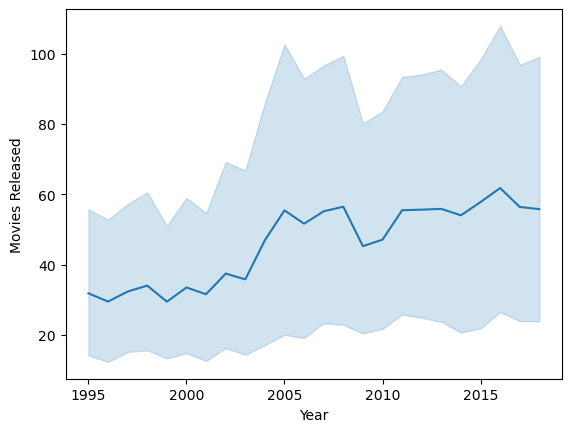

In [10]:
sns.lineplot (x='Year',y='Movies Released',data=df)

#### Observation:

Also, over the time, the total number or released movies in a year seemed to increased.

### Analysis on Genre:

In [14]:
gendata=df.pivot_table(values=['Year','Gross','Top Movie','Inflation-Adjusted Gross'],index=['Genre'],aggfunc='sum')
gendata=gendata[['Movies Released','Gross','Tickets Sold','Inflation-Adjusted Gross']]
gendata

,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross
Genre,,,,
Action,956,44521195322,6286733017,56391995163
Adventure,1005,59706519928,8480812819,76072890986
Comedy,2230,33178178901,5040638417,45214526601
Concert or Performance,63,389502940,49778298,446511334
Dark Comedy,174,1469144207,208096184,1866622769
Documentary,2143,2147962688,322824020,2895731460
Drama,4997,35781438365,5474189407,49103478983
Horror,553,10894902714,1572563195,14105891860
Multiple Genres,39,30056564,3676146,32975028


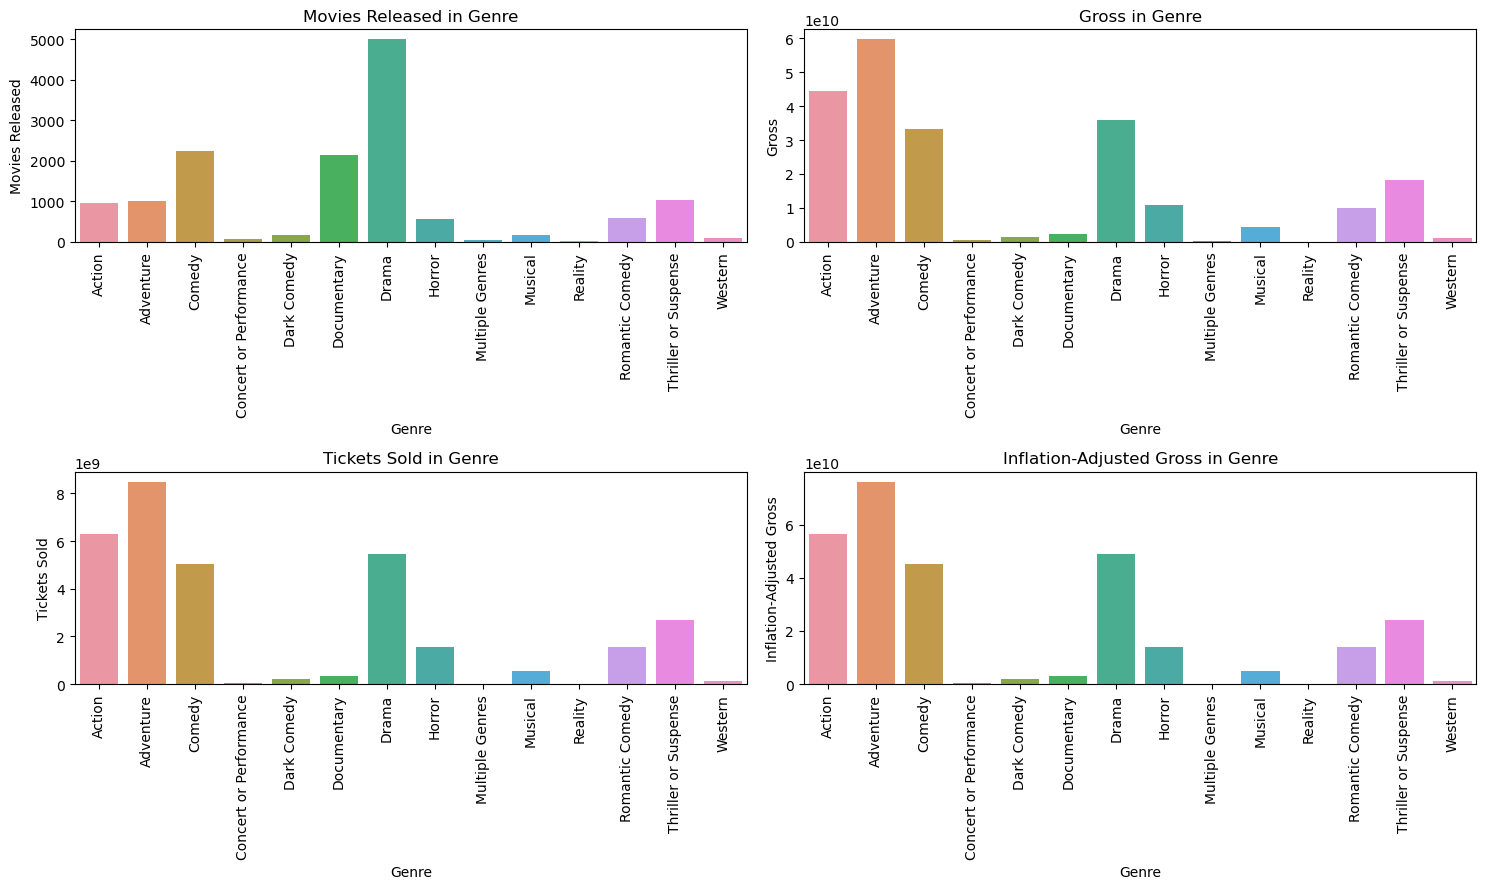

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))

s_axes  = axes.flatten()
c_axes=0

for i in gendata.columns:
  sns.barplot(data=gendata,x=gendata.iloc[:,:0].index,y=i,ax=s_axes[c_axes])
  s_axes[c_axes].set_title(f'{i} in Genre')
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(), rotation=90)
  c_axes+=1

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()
plt.show()


#### Observation:

From the charts, we observe that the most released Genre was Drama, followed by Comedy and Documentary. But overall, the Adventure Genre has the most sold ticket and has the most Gross .

***********************************************************************************************************